In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and log combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        

# Print the city count to confirm sufficient count
len(cities)

600

In [3]:
# URL for GET requests to retrieve weather data

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [4]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls
#Include a print log of each city as it's being processed (with the city number and city name).

city_info = []
counter = 0

# for loop to loop through pandas dataframe and convert to json

for city in cities:
#for city in cities[0:5]:
    city_url = url + "&q=" + city
    counter = counter + 1
    
    
    try:
        
        json_data = requests.get(city_url).json()
        
        city_name = json_data["name"]
        lat = json_data["coord"]["lat"]
        lon = json_data["coord"]["lon"]
        wind = json_data["wind"]["speed"]
        temp_max = json_data["main"]["temp_max"]
        humidity = json_data["main"]["humidity"]
        country = json_data["sys"]["country"]
        date = json_data["dt"]
        cloud = json_data["clouds"]["all"]
        

        city_info.append({
            "city_name": city_name,
            "Lat": lat,
            "Lon": lon,
            "wind": wind,
            "temp_max": temp_max,
            "humidity": humidity,
            "country": country,
            "date": date,
            "cloud": cloud,
           
        })
        
        print(f"Processing Record {counter} of Set {counter} | {city}")
        #sleep(1)

    except:
        print("Not found")
        pass

print("Done")




    
    
    

Processing Record 1 of Set 1 | antofagasta
Processing Record 2 of Set 2 | hithadhoo
Processing Record 3 of Set 3 | vilcun
Processing Record 4 of Set 4 | ishigaki
Not found
Processing Record 6 of Set 6 | kavaratti
Processing Record 7 of Set 7 | hualmay
Processing Record 8 of Set 8 | cape town
Processing Record 9 of Set 9 | guerrero negro
Processing Record 10 of Set 10 | busselton
Processing Record 11 of Set 11 | hobart
Processing Record 12 of Set 12 | punta arenas
Processing Record 13 of Set 13 | ngunguru
Not found
Processing Record 15 of Set 15 | oancea
Processing Record 16 of Set 16 | suzun
Not found
Processing Record 18 of Set 18 | cherskiy
Processing Record 19 of Set 19 | sao filipe
Processing Record 20 of Set 20 | tuatapere
Processing Record 21 of Set 21 | mataura
Processing Record 22 of Set 22 | bonavista
Processing Record 23 of Set 23 | rayevskiy
Processing Record 24 of Set 24 | ushuaia
Processing Record 25 of Set 25 | rikitea
Processing Record 26 of Set 26 | georgetown
Processin

Processing Record 202 of Set 202 | vangaindrano
Processing Record 203 of Set 203 | avarua
Processing Record 204 of Set 204 | yar-sale
Processing Record 205 of Set 205 | umm lajj
Not found
Processing Record 207 of Set 207 | dingle
Processing Record 208 of Set 208 | edd
Processing Record 209 of Set 209 | hirara
Processing Record 210 of Set 210 | tautira
Not found
Processing Record 212 of Set 212 | nantucket
Processing Record 213 of Set 213 | vao
Processing Record 214 of Set 214 | mount gambier
Processing Record 215 of Set 215 | kenai
Processing Record 216 of Set 216 | pitimbu
Processing Record 217 of Set 217 | ballina
Processing Record 218 of Set 218 | rocha
Processing Record 219 of Set 219 | tabou
Processing Record 220 of Set 220 | san juan evangelista
Processing Record 221 of Set 221 | afonso claudio
Processing Record 222 of Set 222 | elizabeth city
Processing Record 223 of Set 223 | westport
Processing Record 224 of Set 224 | dali
Processing Record 225 of Set 225 | viedma
Processing R

Processing Record 402 of Set 402 | mount isa
Processing Record 403 of Set 403 | taman
Not found
Processing Record 405 of Set 405 | amahai
Processing Record 406 of Set 406 | kurumkan
Processing Record 407 of Set 407 | buala
Processing Record 408 of Set 408 | omboue
Processing Record 409 of Set 409 | korla
Processing Record 410 of Set 410 | victoria
Processing Record 411 of Set 411 | amapa
Processing Record 412 of Set 412 | road town
Processing Record 413 of Set 413 | penapolis
Processing Record 414 of Set 414 | nioro
Not found
Processing Record 416 of Set 416 | warri
Processing Record 417 of Set 417 | lyubech
Processing Record 418 of Set 418 | ust-maya
Processing Record 419 of Set 419 | namibe
Not found
Processing Record 421 of Set 421 | sorgun
Processing Record 422 of Set 422 | wenling
Processing Record 423 of Set 423 | boralday
Processing Record 424 of Set 424 | katangli
Processing Record 425 of Set 425 | tortoli
Not found
Processing Record 427 of Set 427 | tawau
Processing Record 428

In [5]:
# Display the DataFrame

city_info_df = pd.DataFrame(city_info)


# Export the city data into a .csv.

city_info_df.to_csv(output_data_file, index_label="City_ID")
city_info_df

,city_name,Lat,Lon,wind,temp_max,humidity,country,date,cloud
0,Antofagasta,-23.65,-70.40,12.75,75.20,53,CL,1580926933,20
1,Hithadhoo,-0.60,73.08,13.91,83.23,81,MV,1580927006,98
2,Vilcun,-38.65,-72.23,11.41,71.01,40,CL,1580927065,40
3,Ishigaki,24.34,124.16,25.14,66.56,76,JP,1580927065,93
4,Kavaratti,10.57,72.64,6.82,81.00,72,IN,1580927009,1
...,...,...,...,...,...,...,...,...,...
548,Sao Caetano de Odivelas,-0.75,-48.02,6.33,79.47,92,BR,1580927163,85
549,Xihe,31.69,113.47,7.70,45.61,80,CN,1580927163,95
550,Zalukokoazhe,43.90,43.22,8.95,37.40,69,RU,1580927163,100
551,Hurghada,27.26,33.81,8.50,68.00,52,EG,1580927163,0


In [6]:
# assign variables

lat = city_info_df["Lat"]
lon = city_info_df["Lat"]
wind = city_info_df["wind"]
temp_max = city_info_df["temp_max"]
humidity = city_info_df["humidity"]
country = city_info_df["country"]
date = city_info_df["date"]
cloud = city_info_df["cloud"]


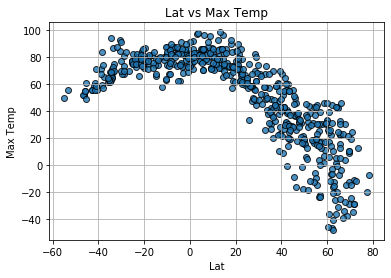

In [7]:
# create scatter plot for Lat vs Max Temp

plt.scatter(lat, temp_max, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("Lat vs Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Lat")
plt.grid(True)
plt.savefig("output_data/fig1.png")
plt.show()

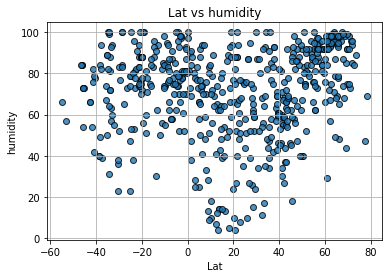

In [8]:
# create scatter plot for Lat vs humidity

# does not look the same as GitLab hw sample

plt.scatter(lat, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("Lat vs humidity")
plt.ylabel("humidity")
plt.xlabel("Lat")
plt.grid(True)
plt.savefig("output_data/fig2.png")
plt.show()

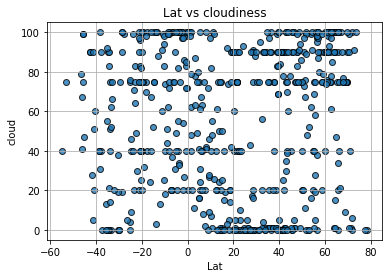

In [9]:
# Create scatter plot for lat vs cloudiness

plt.scatter(lat, cloud, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("Lat vs cloudiness")
plt.ylabel("cloud")
plt.xlabel("Lat")
plt.grid(True)
plt.savefig("output_data/fig3.png")
plt.show()

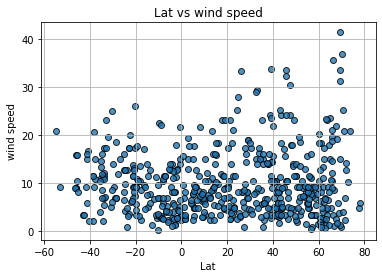

In [10]:
# Create scatter plot for lat vs windiness

plt.scatter(lat, wind, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("Lat vs wind speed")
plt.ylabel("wind speed")
plt.xlabel("Lat")
plt.grid(True)
plt.savefig("output_data/fig4.png")
plt.show()

plt.scatter(lat, cloud, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("Lat vs cloud")
plt.ylabel("cloud")
plt.xlabel("Lat")
plt.grid(True)
plt.savefig("output_data/fig3.png")
plt.show()

The r-squared is: -0.7520602598121725


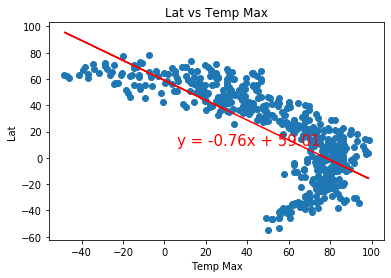

In [11]:
# Create linear regression for Lat vs Max Temp

x_values = temp_max
y_values = lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temp Max')
plt.ylabel('Lat')
plt.title("Lat vs Temp Max")
print(f"The r-squared is: {rvalue}")

plt.show()


The r-squared is: 0.10022564465644826


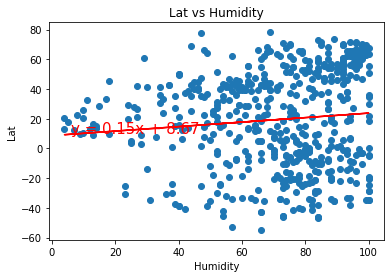

In [12]:
# create linear regression for Lat vs Humidity

x_values = humidity
y_values = lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity')
plt.ylabel('Lat')
plt.title("Lat vs Humidity")
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: 0.06198840662864662


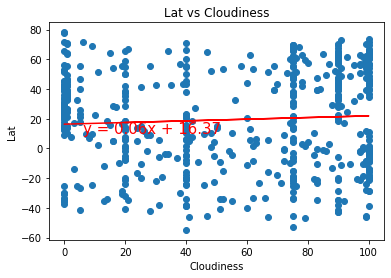

In [13]:
# create linear regress for Lat vs Cloudiness

x_values = cloud
y_values = lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness')
plt.ylabel('Lat')
plt.title("Lat vs Cloudiness")
print(f"The r-squared is: {rvalue}")

plt.show()

The r-squared is: 0.05135972203344923


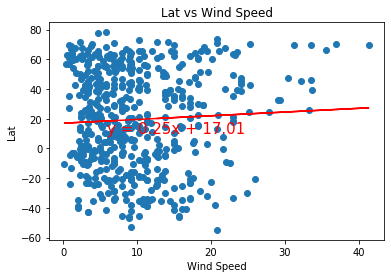

In [14]:
# Create a linear regression for Lat vs Wind Speed

x_values = wind
y_values = lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed')
plt.ylabel('Lat')
plt.title("Lat vs Wind Speed")
print(f"The r-squared is: {rvalue}")

plt.show()